# **ARIMA - Autoregressive integrated moving average**

In [2]:
# evaluate an ARIMA model using a walk-forward validation
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
import matplotlib.pyplot as plt
import pmdarima as pm


C:\Users\legion\AppData\Local\Temp\ipykernel_9568\1744417689.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def parse_time_of_years(time_str):
    start_year, end_year = time_str.split('-')
    start_year = int(start_year)
    return datetime(start_year, 1, 1)

In [4]:
production_data = pd.read_csv('data/Tanger-Tetouan-Hoceima.csv', header=0, index_col=0, skiprows=[0, 1, 2], parse_dates=True, date_parser=parse_time_of_years)

production_data

C:\Users\legion\AppData\Local\Temp\ipykernel_9568\3909300970.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  production_data = pd.read_csv('data/Tanger-Tetouan-Hoceima.csv', header=0, index_col=0, skiprows=[0, 1, 2], parse_dates=True, date_parser=parse_time_of_years)


,Cereales,Ble dur,Ble tendre,Mais,Orge,Legumineuses,Feves,Petits pois,Pois chiches,Lentilles,...,Carottes,Navet,Melon,Pastèque,Haricots verts,Fèves Vertes,Oignons,Courgettes,Concombre,Fraisier
2003-01-01,2603.0,1235.7,1043.1,15.3,598.1,67.5,131.6,35.8,91.6,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01,3190.1,909.1,4124.8,1.7,649.7,47.9,134.1,19.8,80.3,35.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01,2250.5,896.1,949.1,24.3,1224.0,124.6,20.0,7.8,26,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01,2651.6,727.9,853.1,19.2,601.3,120.9,69.5,17.4,38.1,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-01,2254.9,605.8,1422.6,21.1,482.8,106.8,25.7,8.6,28,10.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-01,2222.5,605.8,898.2,26.9,874.3,100.5,20.3,"14,4","39,9","6,6",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01,3824.4,930.5,2042.8,1.6,849.3,119.6,31.0,"26,5","38,9","13,5",...,27.5,12.8,559.8,96.4,1.4,18.3,81.2,13.8,0.8,93.7
2010-01-01,5282.9,1303.7,2082.4,34.1,1789.3,216.6,90.0,"22,8","61,5","21,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,5117.3,1628.8,1901.6,0.5,1360.7,235.8,76.0,"38,5","39,5","7,8",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01,4577.6,1203.1,1422.4,22.5,1971.9,218.2,79.4,"29,1","46,7","17,9",...,53.0,19.8,780.2,112.4,6.2,39.4,177.1,20.2,4.0,150.4


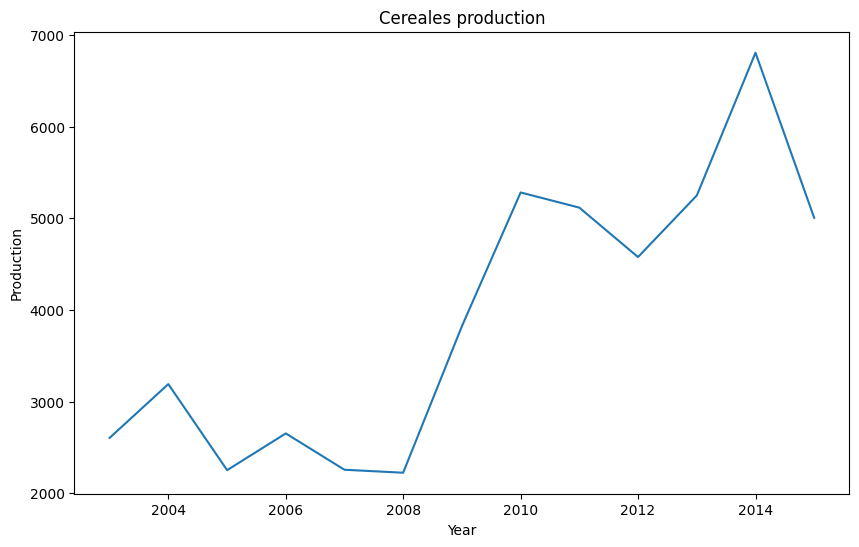

In [5]:
# Visualize the data

plt.figure(figsize=(10, 6))
plt.plot(production_data['Cereales'])
plt.title('Cereales production')
plt.ylabel('Production')
plt.xlabel('Year')
plt.show()

### **How to find the order of differencing (d) in ARIMA model**

In [6]:
production_data.fillna(0, inplace=True)

production_data

,Cereales,Ble dur,Ble tendre,Mais,Orge,Legumineuses,Feves,Petits pois,Pois chiches,Lentilles,...,Carottes,Navet,Melon,Pastèque,Haricots verts,Fèves Vertes,Oignons,Courgettes,Concombre,Fraisier
2003-01-01,2603.0,1235.7,1043.1,15.3,598.1,67.5,131.6,35.8,91.6,9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-01,3190.1,909.1,4124.8,1.7,649.7,47.9,134.1,19.8,80.3,35.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-01,2250.5,896.1,949.1,24.3,1224.0,124.6,20.0,7.8,26,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-01-01,2651.6,727.9,853.1,19.2,601.3,120.9,69.5,17.4,38.1,1.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-01,2254.9,605.8,1422.6,21.1,482.8,106.8,25.7,8.6,28,10.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-01,2222.5,605.8,898.2,26.9,874.3,100.5,20.3,"14,4","39,9","6,6",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-01,3824.4,930.5,2042.8,1.6,849.3,119.6,31.0,"26,5","38,9","13,5",...,27.5,12.8,559.8,96.4,1.4,18.3,81.2,13.8,0.8,93.7
2010-01-01,5282.9,1303.7,2082.4,34.1,1789.3,216.6,90.0,"22,8","61,5","21,7",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01,5117.3,1628.8,1901.6,0.5,1360.7,235.8,76.0,"38,5","39,5","7,8",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-01,4577.6,1203.1,1422.4,22.5,1971.9,218.2,79.4,"29,1","46,7","17,9",...,53.0,19.8,780.2,112.4,6.2,39.4,177.1,20.2,4.0,150.4


In [7]:
# keep only the 'Cereales' column
production_data = production_data[['Cereales']]

result = adfuller(production_data.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.115530
p-value: 0.238316


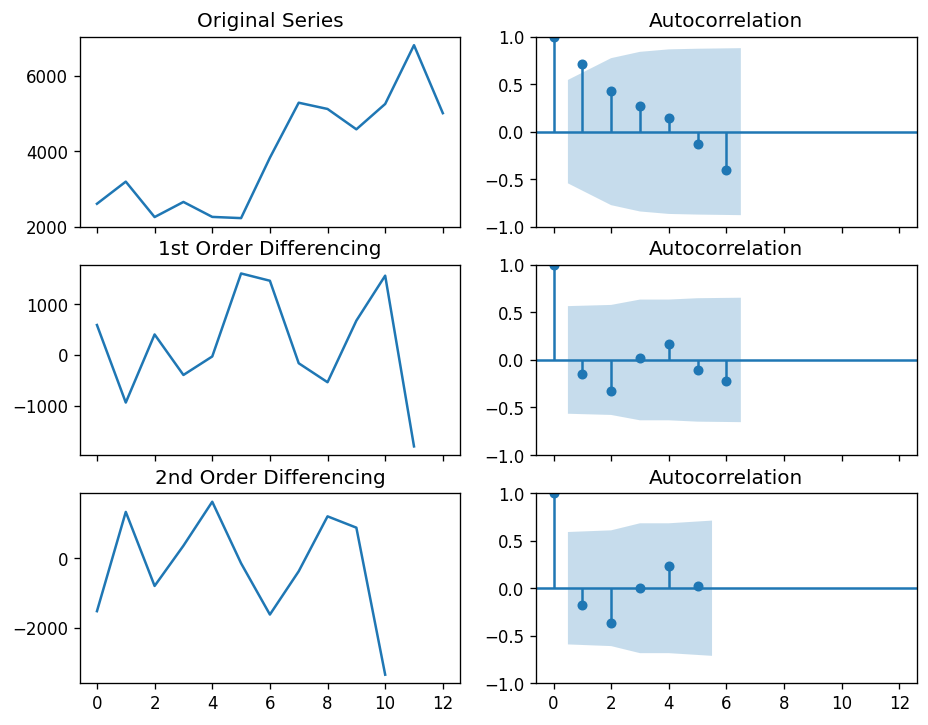

In [8]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(production_data.values); axes[0, 0].set_title('Original Series')
plot_acf(production_data.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(production_data.values, axis=0)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(production_data.values, axis=0), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(production_data.values, axis=0), axis=0)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(production_data.values, axis=0), axis=0), ax=axes[2, 1])

plt.show()

### **How to find the order of the AR term (p)**

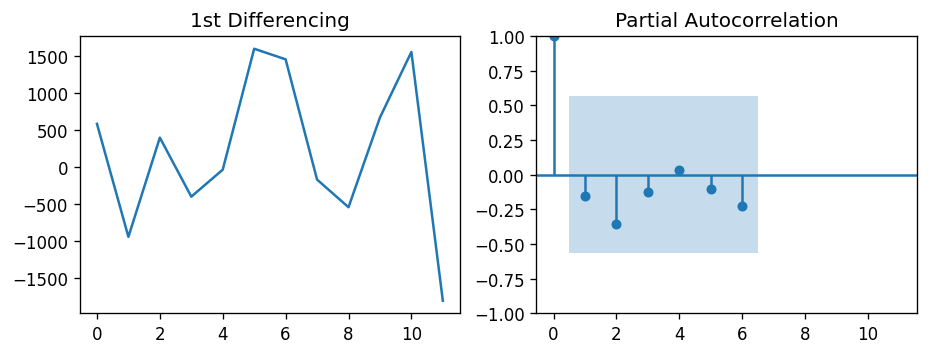

In [9]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(np.diff(production_data.values, axis=0)); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(np.diff(production_data.values, axis=0), ax=axes[1])

plt.show()

We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.

### **How to find the order of the MA term (q)**

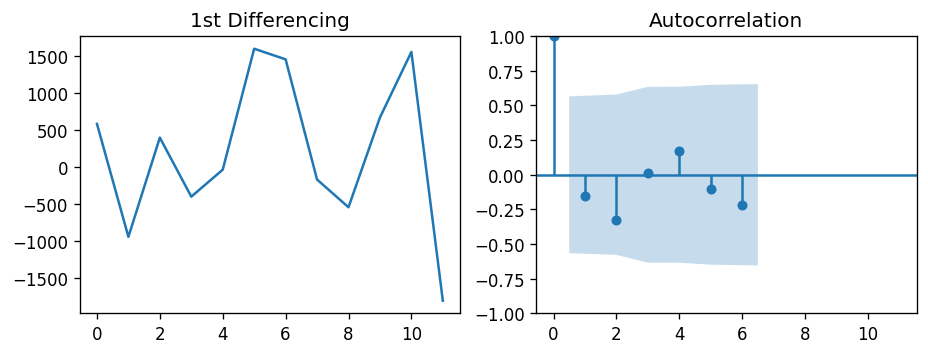

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(np.diff(production_data.values, axis=0)); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(np.diff(production_data.values, axis=0), ax=axes[1])

plt.show()

d:\FST\MST - AIDS\S1\ADVANCED DB\PROJECTS\food-security\app\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\FST\MST - AIDS\S1\ADVANCED DB\PROJECTS\food-security\app\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
d:\FST\MST - AIDS\S1\ADVANCED DB\PROJECTS\food-security\app\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Cereales   No. Observations:                   13
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -100.244
Date:                Thu, 29 Feb 2024   AIC                            204.487
Time:                        22:38:57   BIC                            205.457
Sample:                    01-01-2003   HQIC                           204.128
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0846      0.258     -0.328      0.743      -0.590       0.421
sigma2      1.049e+06   5.64e+05      1.859      0.063   -5.68e+04    2.16e+06
Ljung-Box (L1) (Q):                   0.27   Jarque-

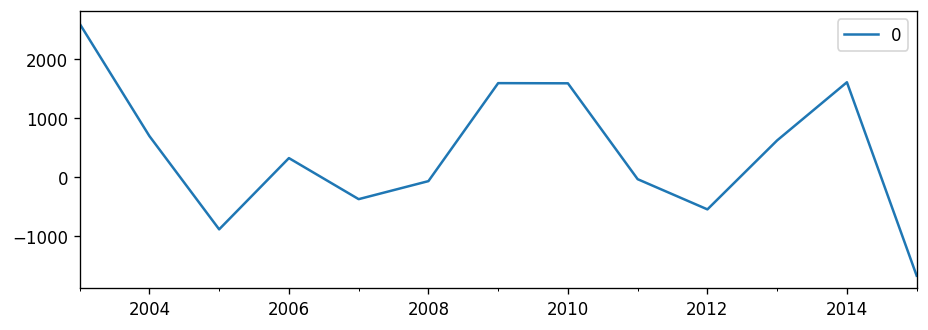

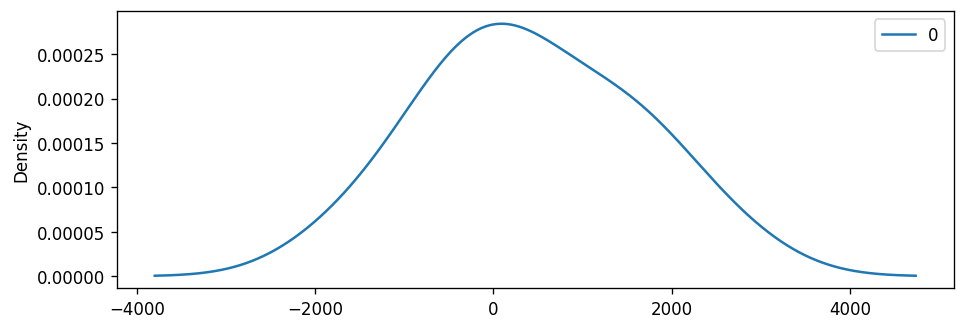

2016-01-01    5146.949716
Freq: YS-JAN, dtype: float64


In [11]:
X = production_data.tail(1)

# fit model
model = ARIMA(production_data, order=(0,1,1))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(model_fit.forecast())

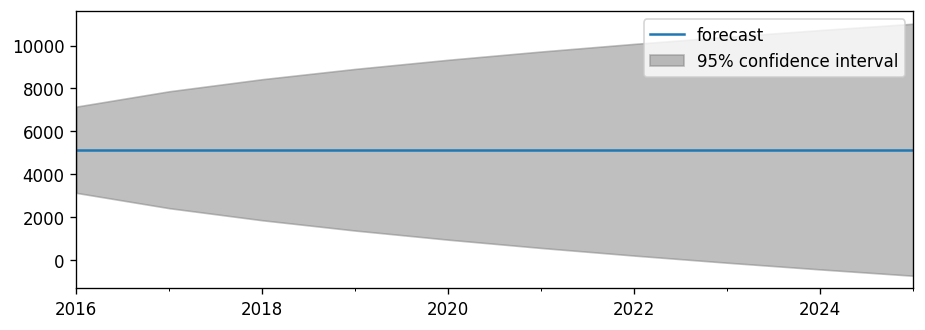

In [12]:
plot_predict(model_fit, '2016', '2025', dynamic=True, ax=plt.gca())
plt.show()

# **Auto ARIMA forcasting**

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=195.491, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=197.206, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=193.732, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.315 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -95.866
Date:                Thu, 29 Feb 2024   AIC                            193.732
Time:                        22:38:58   BIC                            194.130
Sample:                             0   HQIC                           193.482
                                 - 13                                         
Covariance

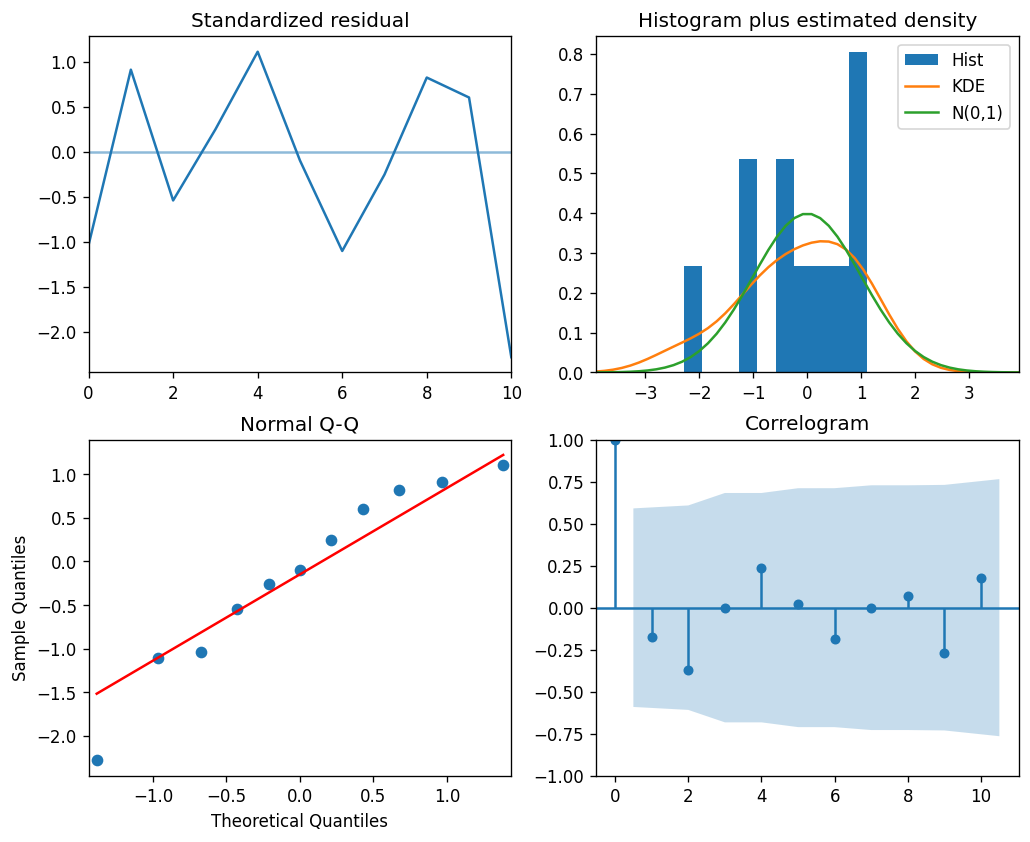

 ARIMA(0,2,0)(0,0,0)[0]          


In [13]:
model = pm.auto_arima(production_data.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

model.plot_diagnostics(figsize=(10,8))
plt.show()

model_fit = model.fit(production_data)

# summary stats of residuals
print(model_fit)

# References

https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting

https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook

https://www.kaggle.com/code/zikazika/using-rnn-and-arima-to-predict-bitcoin-price